# 병충해 분류 딥러닝 인공지능 모델

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy as np
import matplotlib.pyplot as plt
import os

1. 데이터 경로 설정

In [ ]:
DATA_DIR = "/content/drive/MyDrive/data" # 데이터셋 디렉토리
TRAIN_DIR = os.path.join(DATA_DIR, "train") # 학습 데이터 경로
TEST_DIR = os.path.join(DATA_DIR, "test") # 테스트 데이터 경로

2. 데이터 전처리

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary', # 이진 분류 (0, 1)
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

test_generator = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'binary',
    shuffle=False # 테스트 데이터는 순서 유지
)


Found 178 images belonging to 2 classes.
Found 43 images belonging to 2 classes.
Found 15 images belonging to 2 classes.


3. 모델 설계

In [ ]:
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False # 사전 학습 가중치 고정

model = Sequential([
    base_model,
    GlobalAveragePooling2D(), # 평균 풀링
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


4. 콜백 설정

In [ ]:
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint("best_model.keras", monitor='val_loss', save_best_only=True)
]

5. 모델 학습

In [ ]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    callbacks=callbacks
)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


6/6 ━━━━━━━━━━━━━━━━━━━━ 166s 14s/step - accuracy: 0.6940 - loss: 0.6617 - val_accuracy: 0.6744 - val_loss: 0.6328
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 116s 7s/step - accuracy: 0.6403 - loss: 0.6640 - val_accuracy: 0.6744 - val_loss: 0.6314
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 68s 4s/step - accuracy: 0.6383 - loss: 0.6642 - val_accuracy: 0.6744 - val_loss: 0.6318
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 84s 4s/step - accuracy: 0.6416 - loss: 0.6566 - val_accuracy: 0.6744 - val_loss: 0.6326
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 57s 5s/step - accuracy: 0.6640 - loss: 0.6465 - val_accuracy: 0.6744 - val_loss: 0.6311
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 57s 5s/step - accuracy: 0.6465 - loss: 0.6474 - val_accuracy: 0.6744 - val_loss: 0.6310
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 54s 4s/step - accuracy: 0.6594 - loss: 0.6256 - val_accuracy: 0.6744 - val_loss: 0.6311
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 86s 4s/step - accuracy: 0.6759 - loss: 0.6343 - val_accuracy: 0.6744 - val_loss: 0.6313
Epoch 9/20
6/6 ━

6. 모델 저장

In [ ]:
model_path = "plant_health_distribution_model.h5"
model.save(model_path)
print(f"Model successfully saved as: {model_path}")

Model successfully saved as: plant_health_distribution_model.h5


7. 성능 평가 및 시각화

In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.6667 - loss: 0.6365
Test Accuracy: 66.67%


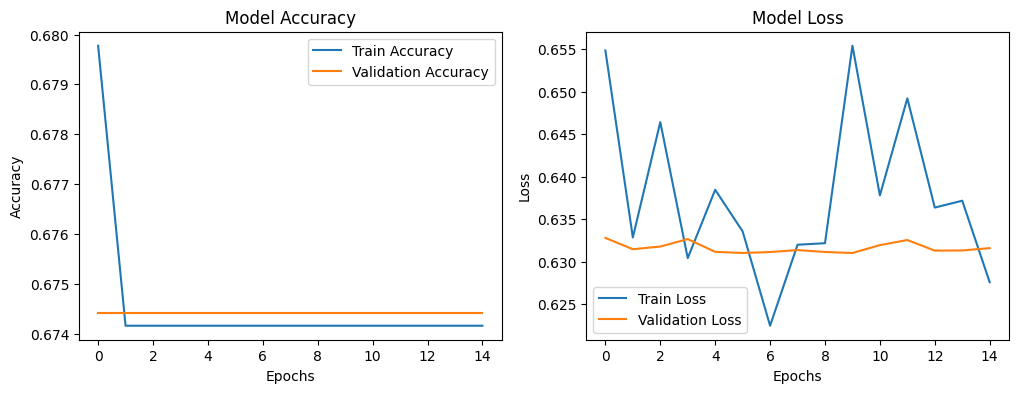

In [ ]:
# 결과 시각화
def plot_history(history):
  plt.figure(figsize=(12, 4))

  # Accuracy
  plt.subplot(1, 2, 1)
  plt.plot(history.history['accuracy'], label='Train Accuracy')
  plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend ()
  plt.title('Model Accuracy')

  # Loss
  plt.subplot(1, 2, 2)
  plt.plot(history.history['loss'], label='Train Loss')
  plt.plot(history.history['val_loss'], label='Validation Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.title('Model Loss')

  plt.show()

plot_history(history)

8. 모델 예측 결과 시각화

8-1. 테스트 데이터 로드

In [ ]:
test_images = []
test_labels = []

for batch_idx in range(len(test_generator)):
    batch_images, batch_labels = test_generator[batch_idx]  # 한 배치의 이미지와 라벨
    test_images.extend(batch_images)  # 배치의 모든 이미지를 리스트에 추가
    test_labels.extend(batch_labels)  # 배치의 모든 라벨을 리스트에 추가


8-2. Numpy 배열로 변환

In [ ]:
test_images = np.array(test_images)
test_labels = np.array(test_labels)

8-3. 시각화 함수

In [ ]:
by def visualize_predictions(images, true_labels, predicted_labels, class_indices):
    plt.figure(figsize=(12, 12))
    class_map = {v: k for k, v in class_indices.items()}  # 클래스 이름 매핑
    for i in range(len(images)):
        plt.subplot(4, 4, i + 1)  # 4x4 그리드
        plt.imshow(images[i])
        true_class = class_map[true_labels[i]]
        predicted_class = class_map[predicted_labels[i][0]]
        color = "green" if true_labels[i] == predicted_labels[i][0] else "red"
        plt.title(f"True: {true_class}\nPred: {predicted_class}", color=color)
        plt.axis("off")
    plt.tight_layout()
    plt.show()

8-4. 모델 예측 수행

In [ ]:
predictions = model.predict(test_images)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


8-5 이진 분류로 변환

In [ ]:
predicted_labels = (predictions > 0.5).astype(int)


8-6. 결과 시각화 실행

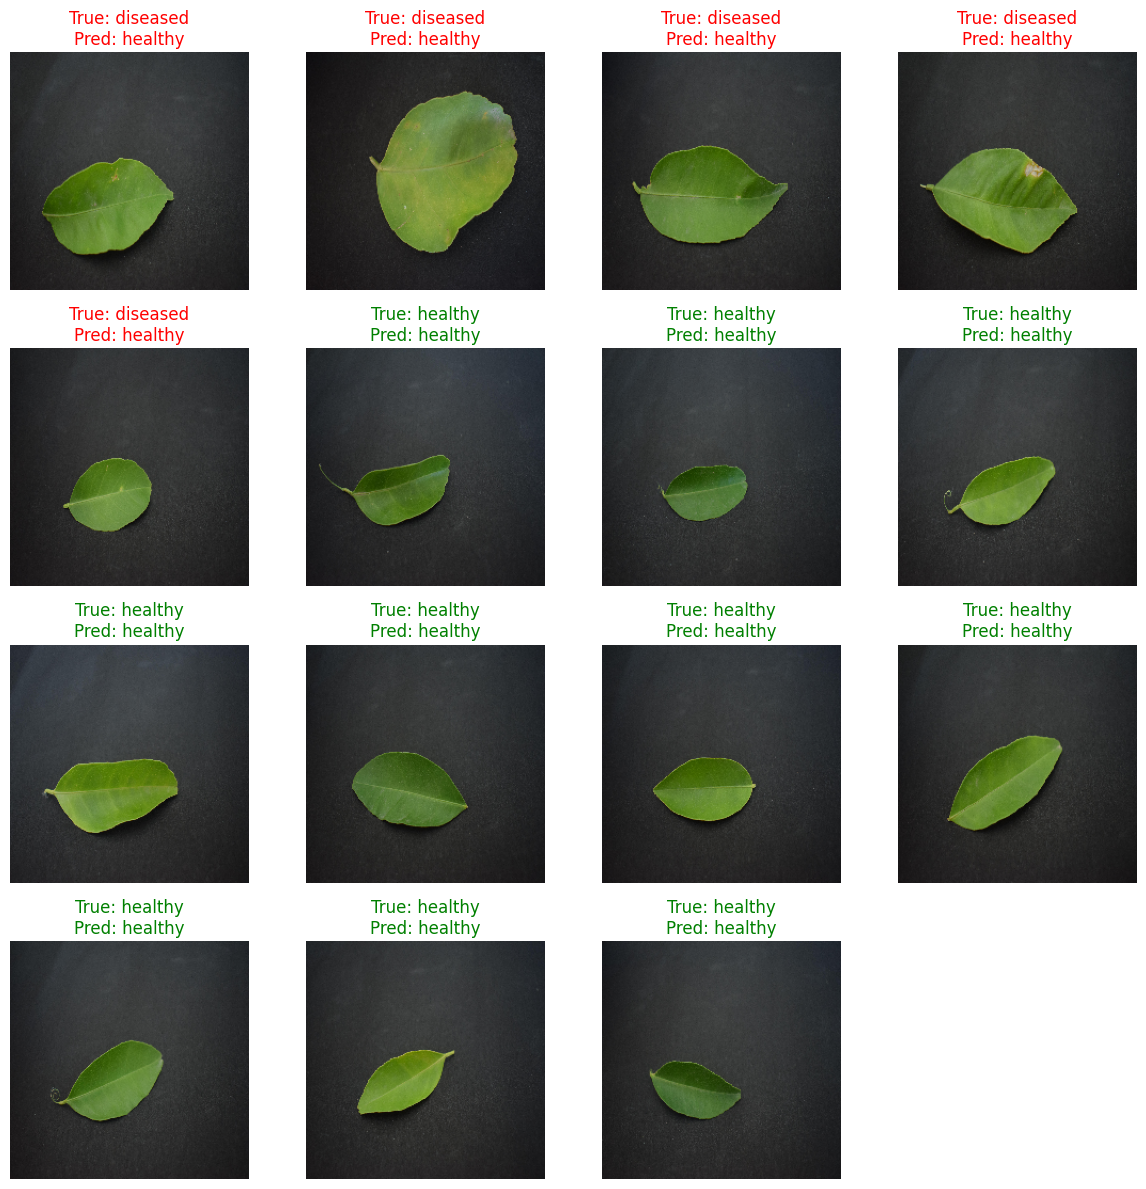

In [ ]:
visualize_predictions(test_images, test_labels, predicted_labels, test_generator.class_indices)